## **DSTEP20 // Heatmaps: Making a DSNY collection calendar view**
<small> January 29, 2020 </small>

This notebook will create a heatmap visualization of the collected refuse tonnage from DSNY.

---

In [0]:
# -- import pandas, numpy, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [0]:
# -- set the filename and read the data while parsing the MONTH column
fname = "https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
dsny  = pd.read_csv(fname, parse_dates=["MONTH"])

# -- sub-select only the first six columns
cols = dsny.columns[:6]
dsny = dsny[cols]

# -- rename the columns for ease of use
dsny.columns = ["month", "borough", "district", "refuse", "paper", "mgp"]

# -- sub-select Brooklyn
bk = dsny[dsny["borough"] == "Brooklyn"].copy()

# -- sum across districts
bk_ts = bk.groupby("month").sum().reset_index()

In [0]:
# -- set year and month number
bk["jan2dec"] = bk["month"].dt.month
bk["year"] = bk["month"].dt.year

In [4]:
bk

,month,borough,district,refuse,paper,mgp,jan2dec,year
6,2002-01-01,Brooklyn,7,3191.7,10.5,568.8,1,2002
7,2008-01-01,Brooklyn,7,3289.8,548.0,404.1,1,2008
8,2007-01-01,Brooklyn,7,3339.9,582.2,391.8,1,2007
9,2012-01-01,Brooklyn,7,3156.7,436.6,343.4,1,2012
10,2006-01-01,Brooklyn,7,3365.5,559.1,430.4,1,2006
...,...,...,...,...,...,...,...,...
20474,2003-03-01,Brooklyn,4,3855.5,143.0,NaN,3,2003
20475,2003-11-01,Brooklyn,4,3735.3,127.4,NaN,11,2003
20476,1992-04-01,Brooklyn,4,3288.6,NaN,NaN,4,1992
20477,1992-09-01,Brooklyn,4,3475.0,NaN,NaN,9,1992


In [0]:
# -- group by year and month number then unstack month number
bk_ustack = bk.groupby(["jan2dec", "year"]).sum().unstack("jan2dec")

In [6]:
bk_ustack

district                       ...     mgp                        
jan2dec       1      2      3      4   ...      9       10      11      12
year                                   ...                                
1991        23.0   46.0   46.0   46.0  ...     0.0     0.0     0.0     0.0
1992       171.0  171.0  171.0  171.0  ...     0.0     0.0     0.0     0.0
1993       171.0  171.0  171.0  171.0  ...  4859.7  4596.4  4324.4  4839.3
1994       171.0  171.0  171.0  171.0  ...  4617.1  4215.5  3907.3  4539.4
1995       171.0  171.0  171.0  171.0  ...  4554.8  4566.2  4439.4  4376.0
1996       171.0  171.0  171.0  171.0  ...  3789.6  4336.6  4004.5  4216.2
1997       171.0  171.0  171.0  171.0  ...  4308.2  5510.6  5030.2  5561.4
1998       171.0  171.0  171.0  171.0  ...  6425.2  6747.6  5719.2  6381.9
1999       171.0  171.0  171.0  171.0  ...  7788.5  7450.9  6629.0  7646.8
2000       171.0  171.0  171.0  171.0  ...  8095.5  7546.8  7493.4  7034.3
2001       171.0  171.0  171.0  171.0  ...  8036.5  8295.9  7991.5  7661.4
2002       171.0  171.0  171.0  171.0  ...     0.0     0.0     0.0     0.0
2003       171.0  171.0  171.0  171.0  ...     0.0     0.0     0.0     0.0
2004       171.0  171.0  171.0  171.0  ...  6437.4  6010.7  5554.7  6244.5
2005       171.0  171.0  171.0  171.0  ...  6276.0  6068.7  5710.9  6053.1
2006       171.0  171.0  171.0  171.0  ...  5817.2  5494.4  5477.2  5352.7
2007       171.0  171.0  171.0  171.0  ...  5396.2  5616.1  5432.9  5263.8
2008       171.0  171.0  171.0  171.0  ...  5613.7  5666.5  4979.6  5931.5
2009       171.0  171.0  171.0  171.0  ...  5624.2  5694.6  4756.3  5895.5
2010       171.0  171.0  171.0  171.0  ...  5554.0  5294.8  4921.5  4560.6
2011       171.0  171.0  171.0  171.0  ...  5229.2  4958.7  4736.4  5401.2
2012       171.0  171.0  171.0  171.0  ...  4923.1  4560.7  5240.6  4863.9
2013       171.0  171.0  171.0  171.0  ...  4979.9  5237.7  4935.6  5676.0
2014       171.0  171.0  171.0  171.0  ...  5377.6  5640.7  4894.0  6138.6
2015       171.0  171.0  171.0  171.0  ...  6087.3  6126.0  5410.0  6839.6
2016       171.0  171.0  171.0  171.0  ...  6496.8  6321.5  6256.1  7238.5
2017       171.0  171.0  171.0  171.0  ...  6637.9  6546.9  6760.5  6876.0
2018       171.0  171.0  171.0  171.0  ...  6799.5  7119.9  7030.3  6775.6
2019       171.0  171.0  171.0  171.0  ...  6808.3  7362.2  6540.9  7537.4
2020       171.0    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN

[30 rows x 48 columns]

In [0]:
# -- select the refuse "column"
bk_tgrid = bk_ustack["refuse"]

# -- convert to tonnage per day units
bk_tgrid = bk_tgrid / np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

In [8]:
bk_tgrid

jan2dec,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1991,1.319355,57.285714,718.835484,756.546667,1108.280645,1967.376667,2701.812903,2522.332258,2508.580000,2531.606452,2492.630000,2414.219355
1992,2318.387097,2426.646429,2535.300000,2678.880000,2623.300000,2866.310000,2746.754839,2610.648387,2739.420000,2633.825806,2697.860000,2678.096774
1993,2442.919355,2399.003571,2582.003226,2732.736667,2535.941935,2643.706667,2391.729032,2338.954839,2454.360000,2303.964516,2501.643333,2373.377419
1994,2263.680645,2140.303571,2590.583871,2501.326667,2437.135484,2663.873333,2420.425806,2492.638710,2382.856667,2275.729032,2495.783333,2370.380645
1995,2196.567742,2045.517857,2223.496774,2283.860000,2462.712903,2558.546667,2367.432258,2328.845161,2283.280000,2308.403226,2421.603333,2145.112903
1996,2224.938710,2184.878571,2187.793548,2483.563333,2465.374194,2457.573333,2509.664516,2434.190323,2376.146667,2438.390323,2356.720000,2366.261290
1997,2171.677419,2123.732143,2145.912903,2479.066667,2439.670968,2435.050000,2414.564516,2283.074194,2404.956667,2225.412903,2228.813333,2299.254839
1998,2130.251613,2081.932143,2150.280645,2323.786667,2282.835484,2442.793333,2213.000000,2123.077419,2333.393333,2194.209677,2120.870000,2181.380645
1999,2008.167742,1983.275000,2207.964516,2149.970000,2136.070968,2431.343333,2151.138710,2145.241935,2321.940000,2126.406452,2234.196667,2189.687097


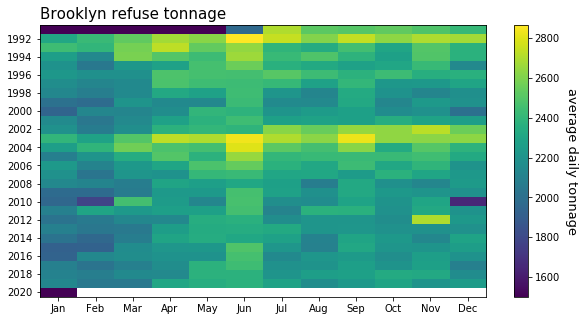

In [50]:
# -- visualize with matplotlib
fig, ax = plt.subplots(figsize=[10, 5])

im = ax.imshow(bk_tgrid, vmin=1500, aspect="auto", cmap="viridis")
ax.set_yticks(np.arange(30)[1::2])
ax.set_yticklabels(np.arange(1991, 2021)[1::2])
ax.set_xticks(np.arange(12))
ax.set_xticklabels(calendar.month_abbr[1:])

ax.set_title("Brooklyn refuse tonnage", fontsize=15, loc="left")

fig.text(0.855, 0.5, "average daily tonnage", fontsize=13, rotation=-90, va="center")

tax = fig.colorbar(im)

In [55]:
print(bk_tgrid[1:-1].mean(axis=0))
print(bk_tgrid[1:-1].std(axis=0))

jan2dec
1     2132.801037
2     2111.520918
3     2237.665553
4     2338.202381
5     2373.864401
6     2494.513333
7     2332.432258
8     2295.447005
9     2373.181786
10    2298.647235
11    2350.746667
12    2256.251382
dtype: float64
jan2dec
1     135.273770
2     146.486502
3     173.745707
4     172.796858
5     130.769671
6     150.935127
7     166.216342
8     153.193603
9     156.641271
10    144.286881
11    178.179932
12    190.381427
dtype: float64


In [15]:
np.arange(1991, 2021)

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [14]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [12]:
foo = np.arange(22, 34)

print(foo)
print(foo[1:8:2])

[22 23 24 25 26 27 28 29 30 31 32 33]
[23 25 27 29]
